<a href="https://colab.research.google.com/github/Ashwinabj/Weather-Image-Recognition/blob/main/Weather%20Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import os

In [33]:
import zipfile

In [34]:
local_zip='/tmp/Weather-Data.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/Weather-Data')
zip_ref.close()

In [35]:
train_cloudy_dir=os.path.join('/tmp/Weather-Data/cloudy')
train_rain_dir=os.path.join('/tmp/Weather-Data/rain')
train_shine_dir=os.path.join('/tmp/Weather-Data/shine')
train_sunrise_dir=os.path.join('/tmp/Weather-Data/sunrise')

In [36]:
print(os.listdir(train_cloudy_dir)[:5])
print(os.listdir(train_rain_dir)[:5])
print(os.listdir(train_shine_dir)[:5])
print(os.listdir(train_sunrise_dir)[:5])

['cloudy31.jpg', 'cloudy219.jpg', 'cloudy286.jpg', 'cloudy93.jpg', 'cloudy246.jpg']
['rain3.jpg', 'rain97.jpg', 'rain47.jpg', 'rain62.jpg', 'rain69.jpg']
['shine49.jpg', 'shine218.jpg', 'shine77.jpg', 'shine45.jpg', 'shine18.jpg']
['sunrise146.jpg', 'sunrise118.jpg', 'sunrise162.jpg', 'sunrise55.jpg', 'sunrise27.jpg']


In [37]:
print(len(os.listdir(train_cloudy_dir)[:]))
print(len(os.listdir(train_rain_dir)[:]))
print(len(os.listdir(train_shine_dir)[:]))
print(len(os.listdir(train_sunrise_dir)[:]))

300
215
253
357


In [38]:
%matplotlib inline

In [39]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [40]:
nrows=4
ncols=4

In [41]:
pic_index=0

In [42]:
fig=plt.gcf()

<Figure size 432x288 with 0 Axes>

In [43]:
fig.set_size_inches(ncols*4,nrows*4)

In [44]:
train_cloudy_names=os.listdir(train_cloudy_dir)
train_rain_names=os.listdir(train_rain_dir)
train_shine_names=os.listdir(train_shine_dir)
train_sunrise_names=os.listdir(train_sunrise_dir)

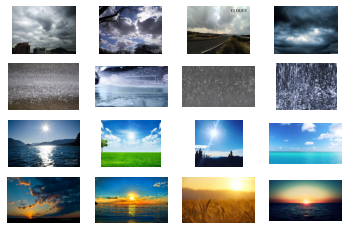

In [45]:
pic_index += 4
next_cloudy_pix = [os.path.join(train_cloudy_dir, fname) 
                for fname in train_cloudy_names[pic_index-4:pic_index]]
next_rain_pix = [os.path.join(train_rain_dir, fname) 
                for fname in train_rain_names[pic_index-4:pic_index]]
next_shine_pix = [os.path.join(train_shine_dir, fname) 
                for fname in train_shine_names[pic_index-4:pic_index]]
next_sunrise_pix = [os.path.join(train_sunrise_dir, fname) 
                for fname in train_sunrise_names[pic_index-4:pic_index]]                                

for i, img_path in enumerate(next_cloudy_pix+next_rain_pix+next_shine_pix+next_sunrise_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [46]:
import tensorflow as tf

In [47]:
model=tf.keras.models.Sequential([
                                  tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(300,300,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),

                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  tf.keras.layers.Dense(4,activation='softmax')

])

In [48]:
model.summary()
class_names=['cloudy','rain','shine','sunrise']

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 149, 149, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 35, 35, 64)      

In [49]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [50]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1/255,
                                 validation_split=0.3)

train_generator=train_datagen.flow_from_directory(
    '/tmp/Weather-Data/',
    target_size=(300,300),
    class_mode='categorical',
    subset='training'
)

validation_generator=train_datagen.flow_from_directory(
     '/tmp/Weather-Data/',
     target_size=(300,300),
     class_mode='categorical',
     subset='validation'
)


Found 789 images belonging to 4 classes.
Found 336 images belonging to 4 classes.


In [51]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights = True)

In [53]:
history=model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=100,
    verbose=2,
    callbacks = [es]
)

Epoch 1/100
25/25 - 85s - loss: 1.4398 - accuracy: 0.4981 - val_loss: 0.8329 - val_accuracy: 0.6310 - 85s/epoch - 3s/step
Epoch 2/100
25/25 - 82s - loss: 0.6564 - accuracy: 0.7529 - val_loss: 0.7597 - val_accuracy: 0.6815 - 82s/epoch - 3s/step
Epoch 3/100
25/25 - 80s - loss: 0.5370 - accuracy: 0.7858 - val_loss: 0.5060 - val_accuracy: 0.7917 - 80s/epoch - 3s/step
Epoch 4/100
25/25 - 87s - loss: 0.4378 - accuracy: 0.8327 - val_loss: 0.5691 - val_accuracy: 0.8065 - 87s/epoch - 3s/step
Epoch 5/100
25/25 - 79s - loss: 0.4004 - accuracy: 0.8606 - val_loss: 0.4847 - val_accuracy: 0.8006 - 79s/epoch - 3s/step
Epoch 6/100
25/25 - 82s - loss: 0.3591 - accuracy: 0.8593 - val_loss: 0.5401 - val_accuracy: 0.8036 - 82s/epoch - 3s/step
Epoch 7/100
25/25 - 81s - loss: 0.3110 - accuracy: 0.8961 - val_loss: 0.4531 - val_accuracy: 0.8304 - 81s/epoch - 3s/step
Epoch 8/100
25/25 - 78s - loss: 0.2605 - accuracy: 0.9113 - val_loss: 0.4166 - val_accuracy: 0.8423 - 78s/epoch - 3s/step
Epoch 9/100
25/25 - 76s 

In [54]:
result1=model.evaluate(train_generator)
result2=model.evaluate(validation_generator)
print(result1[1]*100,result2[1]*100)

11/11 [==============================] - 10s 824ms/step - loss: 0.3373 - accuracy: 0.8780
98.73257279396057 87.79761791229248


Saving forest-and-green-field-nature-landscape-on-cloudy-day-sky-with-lot-white-clouds-above-forest-trees-nature-and-freedom-concept-cloudy-weather-forecast-weather-changes-signs-cloudy-sky-and-nature-R24WPR.jpg to forest-and-green-field-nature-landscape-on-cloudy-day-sky-with-lot-white-clouds-above-forest-trees-nature-and-freedom-concept-cloudy-weather-forecast-weather-changes-signs-cloudy-sky-and-nature-R24WPR.jpg


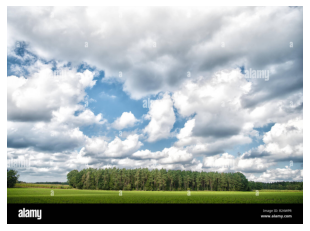

This is an image of cloudy


In [56]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn

  sp = plt.subplot(1,1,1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(path)
  plt.imshow(img)

  plt.show()

  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print("This is an image of "+class_names[np.argmax(classes)])